## Create Dataset for filtering: Idea Startup

In [2]:
!pip3 install requests Pillow beautifulsoup4

In [ ]:
import requests, os
from bs4 import BeautifulSoup

# https://www.crummy.com/software/BeautifulSoup/bs4/doc/

response = requests.get("https://ideasai.com/data-startup-ideas")
soup = BeautifulSoup(response.text, "html.parser")

ideas = soup.findAll('h3', class_='idea')
idea_descriptions = [desc.text for desc in ideas]
print(idea_descriptions, len(idea_descriptions))

votes = soup.findAll('span', class_='votes')
voting = [v.text for v in votes]
print(voting)

print (len(voting), len(idea_descriptions))

import csv

file_path='data/valid_ideas.csv'
print(os.getcwd())

  # Try to open non-existing file to write data
with open(file_path, "x+") as file:
  # Read the contents of the file
  for idx in range(len(voting)):
    desc = idea_descriptions[idx].replace('"', '')
    vote = voting[idx].replace(',', '')
    sen = ';'.join([desc, '1', vote, '\n'])
    file.write(sen)

In [ ]:
import requests, json
from bs4 import BeautifulSoup

# https://www.crummy.com/software/BeautifulSoup/bs4/doc/

response = requests.get("https://randomwordgenerator.com/json/sentences.json")
type(response.text)
data = json.loads(response.text)
print(data["data"])
sentences = data["data"]

import csv

with open('data/invalid-sentences.csv', 'x+', newline='') as file:
  writer = csv.writer(file)
  
  for idx in range(len(sentences)):
    writer.writerow([sentences[idx]["sentence"], 0])
    

In [ ]:
import requests, json
from bs4 import BeautifulSoup

# https://www.crummy.com/software/BeautifulSoup/bs4/doc/

response = requests.get("https://www.randomsentencegen.com/sentence-with-startup")
soup = BeautifulSoup(response.text, "html.parser")

ideas = soup.findAll('tr', class_='item')
idea_descriptions = [desc.text for desc in ideas]
print(idea_descriptions, len(idea_descriptions))

import csv

with open('data/invalid-sentences.csv', 'x+', newline='') as file:
  writer = csv.writer(file)
  
  for idx in range(len(sentences)):
    writer.writerow([sentences[idx]["sentence"], 0])
    

## Translating En to Vie

In [ ]:
import pandas as pd

inv = pd.read_csv("data/invalid_sentences.csv", delimiter=';')
# invalid_1 = pd.read_csv("data/random_str.csv", delimiter=',')
semantic = pd.read_csv("data/valid_ideas.csv", delimiter=';', usecols=['sentence', 'spam'])

inv.head()
semantic.head()

frames = [inv, semantic]
 
df = pd.concat(frames)
en_sent = inv.sentence.to_list()
en_sent_1 = semantic.sentence.to_list()

en_sent

In [ ]:
import torch
torch.cuda.is_available()

In [ ]:
import os

# Specify the file path
# file_path = "data/vie/text_valid.csv"

def write_to_file(sentence, label, file_path):
# Check if the file exists
  if os.path.exists(file_path):
      # File exists, open in append mode
      with open(file_path, "a") as file:
          file.write(f'{sentence};{label}\n')
  else:
      # File doesn't exist, create and write content
      with open(file_path, "w") as file:
          file.write(f'{sentence};{label}\n')


In [ ]:
write_to_file("hello", 1, 'data/vie/testttt.txt')

#### Write Vie SPAM Idea Dataset to CSV

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM


model_name = "VietAI/envit5-translation"
tokenizer = AutoTokenizer.from_pretrained(model_name)  
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Specify the file path
file_path = "data/vie/spam.csv"

# Write Vie Spam Dataset to CSV
for sent in en_sent:
  sentence = "en: " + sent
  inputs = [sentence]
  outputs = model.generate(tokenizer(inputs, return_tensors="pt", padding=True).input_ids, max_length=512)
  vie_trans = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0][4:]
  write_to_file(vie_trans,0, file_path)


#### Write Vie Valid Idea Description Dataset to CSV

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "VietAI/envit5-translation"
tokenizer = AutoTokenizer.from_pretrained(model_name)  
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Specify the file path
file_path = "data/vie/valid_idea.csv"

# Write Vie Valid Idea Description Dataset to CSV
for sent in en_sent_1:
  sentence = "en: " + sent
  inputs = [sentence]
  outputs = model.generate(tokenizer(inputs, return_tensors="pt", padding=True).input_ids, max_length=512)
  vie_trans = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0][4:]
  write_to_file(vie_trans,1,file_path)

## Filtering by LSTM

### Import

In [ ]:
import pandas as pd

invalid_0 = pd.read_csv("data/invalid_sentences.csv", delimiter=';')
invalid_1 = pd.read_csv("data/random_str.csv", delimiter=',')
semantic = pd.read_csv("data/valid_ideas.csv", delimiter=';', usecols=['sentence', 'spam'])

invalid_0.head()
invalid_1.head()
semantic.head()

frames = [invalid_0, semantic, invalid_1]
 
df = pd.concat(frames)

df.head()

### Sequence Model

Install Tensorflow on M1: https://medium.com/@sorenlind/tensorflow-with-gpu-support-on-apple-silicon-mac-with-homebrew-and-without-conda-miniforge-915b2f15425b

In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip3 install -U tensorflow-macos tensorflow-metal
!pip3 install plotlib tf-models-official

In [ ]:
!pip3 show tensorflow
!pip3 install tensorflow

In [ ]:
import os
import shutil

import tensorflow as tf

tf.config.experimental.list_physical_devices('GPU')
tf.test.is_gpu_available()
# from official.nlp import optimization  # to create AdamW optimizer

tf.get_logger().setLevel('ERROR')

In [ ]:
!pip3 install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

#Create test and train samples from one dataframe with pandas?
train_data, test_data = train_test_split(df, test_size=0.3)

In [ ]:
train_list = train_data.values.tolist()
# print(train_list)

## EMBEDDING LAYER

In [3]:
!pip3 install pandas numpy seaborn matplotlib scikit-learn keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 501.6 kB/s eta 0:00:001m523.2 kB/s eta 0:00:01
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.6/153.6 kB 1.4 MB/s eta 0:00:004.1 MB/s eta 0:00:01
  Using cached kiwisolver-1.4.5-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached scipy-1.11.3-cp310-cp310-macosx_12_0_arm64.whl.metadata (112 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 3.4 MB/s eta 0:0

In [4]:
!pip3 install tensorflow

  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.10.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached libclang-16.0.6-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached wrapt-1.14.1-cp310-cp310-macosx_11_0_arm64.whl (35 kB)
  Using cached tensorflow_io_gcs_filesystem-0.34.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (14 kB)
  Using cached wheel-0.41.3-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached rsa-4.9-

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
# tf.keras.optimizers.legacy.RMSprop
from keras.src.optimizers.legacy.rmsprop import RMSprop
from keras.src.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
import pandas as pd

invalid_0 = pd.read_csv("data/invalid_sentences.csv", delimiter=';')
invalid_1 = pd.read_csv("data/random_str.csv", delimiter=',')
semantic = pd.read_csv("data/valid_ideas.csv", delimiter=';', usecols=['sentence', 'spam'])

invalid_0.head()
invalid_1.head()
semantic.head()

frames = [invalid_0, semantic, invalid_1]
 
df = pd.concat(frames)

df = df.reset_index()
# df[100:120]
# df.index.duplicated()
df.index
# df.loc[df.index.unique()]

In [ ]:
sns.countplot(df, x="spam")
plt.xlabel('Label')
plt.title('Number of ham (1) and spam (0) ideas')

In [ ]:
X = df.sentence
Y = df.spam
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
def RNN():
  inputs = Input(name='inputs',shape=[max_len])
  layer = Embedding(max_words,50,input_length=max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256,name='FC1')(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1,name='out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs,outputs=layer)
  return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=5,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
word_idx = 10
prediction = model.predict(test_sequences_matrix[word_idx:word_idx+10])
print(prediction, X_test[word_idx:word_idx+10])

In [ ]:
def input(new_sentence, ai_model):
  new_sentence = new_sentence + "."
  test_sequences = tok.texts_to_sequences([new_sentence])
  test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)
  prediction = ai_model.predict(test_sequences_matrix)
  label = "spam"
  if prediction > 0.5:
    label = "innovative idea"
  print(prediction, new_sentence[:30] + '...')

In [ ]:

input("Nghi is building an AI app for tracking habit automatically that use voice-over to record your daily activities", model)
input("Origin recipes for this manificient coffee shop", model)
input("This is the new way to play guitar", model)
input("This is the new book", model)
input("This is the new AI model helping homework completion", model)
input("We are operating new AI model to auto complete homework", model)
input("Instagram is so popular that now everyone is using, scrolling til tired", model)

In [ ]:
input("SmartMirror Health Assistant: A cutting-edge innovation that combines a traditional mirror with advanced AI technology to create a personalized health monitoring system. The SmartMirror analyzes facial features and provides real-time health insights, such as heart rate, stress levels, and skin condition. It also offers personalized workout recommendations and nutrition tips based on individual goals. With voice control and integration with smart devices, the SmartMirror Health Assistant revolutionizes daily routines, empowers users to make informed health decisions, and promotes overall well-being in a seamless and interactive way.", model)

In [ ]:
input("Paperclip Organizer: A simple and practical solution for keeping paperclips organized and easily accessible. This compact organizer features separate compartments for different sizes and colors of paperclips, preventing them from getting lost or tangled. Its sleek design takes up minimal desk space, offering convenience and efficiency for everyday office tasks.", model)
input("A budget-friendly hotel chain providing comfortable accommodations, basic amenities, and convenient locations near popular attractions.", model)
input("A travel agency offering pre-packaged vacation deals to popular tourist destinations, with standard itineraries and accommodations.", model)

In [ ]:
docs = """
A travel agency that specializes in creating immersive cultural experiences for travelers
"""

In [ ]:
input(docs, model)

## PhoBERT Embedding - Vietnamese Spam Filtering

[Hugging Face - PhoBERT](https://huggingface.co/docs/transformers/model_doc/phobert)

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

phobert = AutoModel.from_pretrained("vinai/phobert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

# INPUT TEXT MUST BE ALREADY WORD-SEGMENTED!
line = "Tôi là sinh_viên trường đại_học Công_nghệ ."

input_ids = torch.tensor([tokenizer.encode(line)])

with torch.no_grad():
  features = phobert(input_ids) # Models outputs are now tuples


In [ ]:
!pip3 install underthesea

In [81]:
tag_sentence = 'Dịch vụ đặt vé trực tuyến của chúng tôi, EasyBooking, giúp bạn dễ dàng tìm kiếm, so sánh và đặt vé máy bay, khách sạn và tour du lịch. Với giao diện thân thiện và tính năng tiện lợi, chúng tôi mang đến trải nghiệm đặt vé nhanh chóng và tiết kiệm thời gian cho bạn'

In [82]:
from underthesea import pos_tag, chunk, classify

pos_str = pos_tag(tag_sentence)
text_group = set([word for word,tag,num in chunk(tag_sentence) if tag == 'Np' or tag == 'N' or tag == 'V'])
# class_of_text = classify(tag_sentence)
nouns = set([word for word,tag in pos_str if tag == 'Np' or tag == 'N'])
print(text_group)

{'tour', 'giúp', 'tính năng', 'vé', 'tìm kiếm', 'EasyBooking', 'bạn', 'máy bay', 'giao diện', 'thân thiện', 'thời gian', 'trải nghiệm', 'mang', 'so sánh', 'trực tuyến', 'Dịch vụ', 'đặt', 'du lịch', 'khách sạn', 'tiết kiệm'}


# Viet IDEA Spam Filtering

In [47]:
import pandas as pd

abs_path = '/Users/macos/Code/Graduation/share-your-idea/ml-server/'
invalid_1 = pd.read_csv(abs_path + "data/random_str.csv", delimiter=',')
invalid_0 = pd.read_csv(abs_path + "data/vie/spam.csv", delimiter=';')
semantic = pd.read_csv(abs_path + "data/vie/valid_idea.csv", delimiter=';', usecols=['sentence', 'spam'])

invalid_0.head()
invalid_1.head()
semantic.head()

frames = [invalid_0, semantic, invalid_1]
 
df = pd.concat(frames)

df.sample(10)

,sentence,spam
2025,Một công ty khởi nghiệp xây dựng nền tảng cho ...,1
448,Cô nhìn vào gương và thấy một người khác.,0
163,cjvdtzzlppasv vmyirzvkfiqsi ozxumazlexyeflwlyf...,0
1317,"Một công cụ ""thông tin kinh doanh"" cho các cơ ...",1
1355,Mục đích từ thiện nào bạn hy vọng sẽ hỗ trợ tr...,0
1261,Điều gì là kỳ quan thiên nhiên quyến rũ nhất m...,0
1159,"Nếu bạn có thể nuôi bất kỳ con vật nào, đó sẽ ...",0
38,Mary chơi piano.,0
780,Một đĩa than cổ quay trên bàn xoay.,0
423,Những con cự đà đang rơi khỏi cây.,0


Text(0.5, 1.0, 'Number of ham (1) and spam (0) ideas')

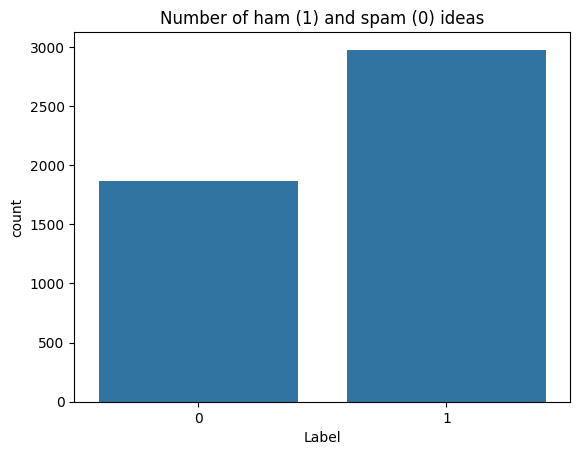

In [48]:
sns.countplot(df, x="spam")
plt.xlabel('Label')
plt.title('Number of ham (1) and spam (0) ideas')

In [49]:
X = df.sentence
Y = df.spam
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [50]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [72]:
def RNN():
  inputs = Input(name='inputs',shape=[max_len])
  layer = Embedding(max_words,50,input_length=max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256,name='FC1')(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1,name='out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs,outputs=layer)
  model.load_weights(model_weights_file)
  return model

In [73]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=1e-3),metrics=['accuracy'])

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_5 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_10 (Activation)  (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [74]:
history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=5,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/5
26/26 [==============================] - 5s 130ms/step - loss: 0.0112 - accuracy: 0.9976 - val_loss: 0.0590 - val_accuracy: 0.9927
Epoch 2/5
 3/26 [==>...........................] - ETA: 2s - loss: 0.0021 - accuracy: 1.0000

KeyboardInterrupt: 

In [54]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [75]:
accr = model.evaluate(test_sequences_matrix,Y_test)

23/23 [==============================] - 1s 28ms/step - loss: 0.0358 - accuracy: 0.9904


In [56]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.033
  Accuracy: 0.990


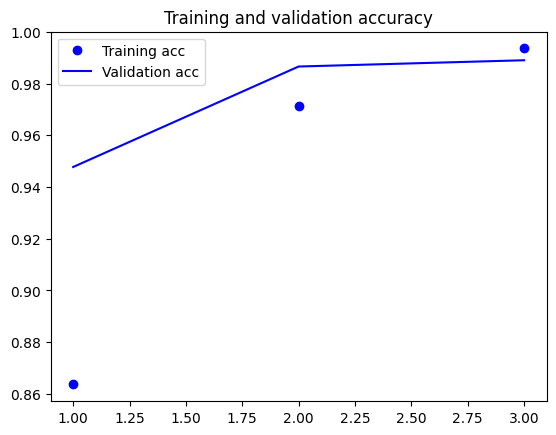

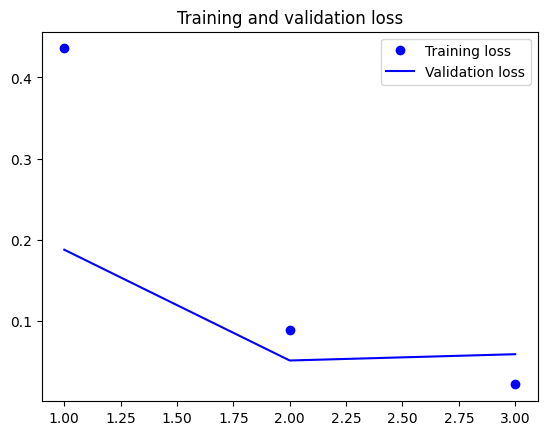

In [57]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [76]:
word_idx = 17
prediction = model.predict(test_sequences_matrix[word_idx:word_idx+5])
print(prediction, X_test[word_idx:word_idx+5])

1/1 [==============================] - 0s 338ms/step
[[1.7729662e-03]
 [9.9999678e-01]
 [9.9985182e-01]
 [3.8536440e-05]
 [9.9999225e-01]] 1192           Bạn muốn làm gì để đóng góp cho cộng đồng?
496     Một công ty khởi nghiệp xây dựng một trí tuệ n...
293     Khởi nghiệp Cleantech sử dụng dữ liệu, AI và b...
369     oxyarsutlnvz nrrodl vhbmgtoighjk rkmgkqvuyaazs...
1268    Một bộ các ứng dụng được kết nối tạo ra nhật k...
Name: sentence, dtype: object


In [71]:
import pickle

# https://machinelearningmastery.com/save-load-keras-deep-learning-models/
# save the iris classification model as a pickle file
model_pkl_file = "../src/model/spam_filtering.pkl"  
model_json_file = "../src/model/spam_filtering.json"
model_weights_file = "../src/model/weights.h5py"


# serialize model to JSON
model_json = model.to_json()
with open(model_json_file, 'w') as file:  
  file.write(model_json)

# serialize weights to HDF5
model.save_weights(model_weights_file)

In [68]:
from keras.models import load_model

save_model_file='../src/model/lstm'
model.save(save_model_file)

TypeError: Model.save() missing 1 required positional argument: 'filepath'

In [96]:
def input(new_sentence, ai_model):
  new_sentence = new_sentence + "."
  test_sequences = tok.texts_to_sequences([new_sentence])
  test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)
  prediction = ai_model.predict(test_sequences_matrix)
  label = "SPAM"
  if prediction > 0.5:
    label = "VALID"
  # print(prediction, label, new_sentence[:30] + '...')
  print(test_sequences_matrix)

In [16]:
docs = """Một ống kính độ dài 2.5cm đang chỉa thẳng xuống mặt đất để đo đạc và chụp lại""" #Spam

In [21]:
docs = """MR.Bean là một sản phẩm tái tạo năng lượng bằng hệ thống xử lí chất thải sinh học tự động""" #Spam

In [23]:
docs = """Agelina - đứa con của công ty mẹ Egosh, là sàn thương mại điện tử nức tiếng nước Đức""" #Spam

In [17]:
docs = """"SmartMirror Health Monitor" là một hệ thống kết hợp gương trang điểm thông minh với chức năng theo dõi sức khỏe. Gương sẽ hiển thị thông tin về nhịp tim, nhiệt độ cơ thể và các thông số sức khỏe khác. Ngoài ra, nó cũng cung cấp các gợi ý về dinh dưỡng và chế độ tập luyện dựa trên dữ liệu cá nhân. SmartMirror Health Monitor giúp người dùng theo dõi sức khỏe một cách thuận tiện trong khi trang điểm hoặc thay đồ hàng ngày.""" #Valid

In [94]:
docs = """"Ứng dụng kết hợp với cảm biến đất, ánh sáng và nước để giám sát và quản lý cây trồng. Người dùng sẽ nhận được thông báo để tưới nước, bón phân và chăm sóc cây đúng cách, tạo điều kiện tối ưu cho sự phát triển và sức khỏe của cây.""" #Valid

In [ ]:
docs = """Sản phẩm TechSmart đem đến cho bạn sự tiện ích và khả năng kết nối thông minh. Với tính năng đột phá và hiệu suất cao, chúng tôi giúp bạn trải nghiệm công nghệ tối ưu và tận hưởng cuộc sống hiện đại""" #Spam

In [97]:
input(docs, model)

1/1 [==============================] - 0s 44ms/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0  67  14 100  68  19 285 320 869
  681 288   2 332  10 469 418   2  42  33 499 688  16  72  87 229  23  55
  276  10 332  71   2 246 245 499 608  26  60 126 445 327 437   9  97 113
  133   2  95 141   7 499]]


### Gibberish Detector

In [ ]:
!pip3 install gibberish-detector

In [ ]:
!gibberish-detector train data/WIKI.txt > vie.model

In [ ]:
from gibberish_detector import detector

# open('data/WIKI.txt')

Detector = detector.create_from_model('vie.model')
print(Detector.is_gibberish('Chào, tớ là osijd lldkn qwoie')) #Gibberish

In [104]:
import pandas as pd
import sys
from underthesea import chunk, pos_tag
from keras.models import Sequential, model_from_json
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from gensim.models import KeyedVectors
from gensim import models
from gibberish_detector import detector
import pickle

model_json_file = "../src/model/spam_filtering.json"
model_weights_file = "../src/model/weights.h5py"
word2vec_path='../src/model/word2vec.vie.model.bin'
gibberish_path='../src/model/gibberish.vie.model'
max_words = 1000
max_len = 150

# with open(model_json_file, 'r') as file:  
#   json_model = file.read()
#   lstm_model = model_from_json(json_model)
#   lstm_model.load_weights(model_weights_file)
#   lstm_model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=1e-3),metrics=['accuracy'])

class SpamFiltering:
  def __init__(self, lstm_model) -> None:
    self.tokenizer = Tokenizer(num_words=max_words)
    self.detector = detector.create_from_model(gibberish_path)
    self.lstm_model = lstm_model

  def is_idea_spam(self, idea_object):
    desc = [idea_object.solution + '.']
    print(desc)
    if self.detector.is_gibberish(desc):
      return "SPAM"
    self.tokenizer.fit_on_texts(desc)
    test_sequences = self.tokenizer.texts_to_sequences(desc)
    test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)
    print(test_sequences)
    prediction = self.lstm_model.predict(test_sequences_matrix)
    # prediction = model.predict(test_sequences_matrix)
    label = "SPAM"
    if prediction > 0.5:
      label = "VALID"
    elif prediction > 0.3:
      label = "WARNING"
    print(prediction, f' -> {label} :: "{desc[:30]}..."')
    return label

In [63]:
class IdeaObj:
  def __init__(self,problem='',solution='') -> None:
    self.problem=problem
    self.solution=solution

In [106]:
def main():
  try:
    lstm_model=None
    with open(model_json_file, 'r') as file:  
      json_model = file.read()
      lstm_model = model_from_json(json_model)
      lstm_model.load_weights(model_weights_file).expect_partial()
      # lstm_model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=1e-3),metrics=['accuracy'])
    spam = SpamFiltering(lstm_model)
    problem='tài chính'
    solution="Một ứng dụng cho phép người dùng quản lí tài chính cá nhân bằng trực quan hóa số liệu và hỗ trợ quyết định đầu tư, tiết kiệm."
    solution="""Ứng dụng kết hợp với cảm biến đất, ánh sáng và nước để giám sát và quản lý cây trồng. Người dùng sẽ nhận được thông báo để tưới nước, bón phân và chăm sóc cây đúng cách, tạo điều kiện tối ưu cho sự phát triển và sức khỏe của cây."""
    idea = IdeaObj(problem=problem, solution=solution)
    spam.is_idea_spam(idea)
  except ValueError as ve:
    return str(ve)

main()

['Ứng dụng kết hợp với cảm biến đất, ánh sáng và nước để giám sát và quản lý cây trồng. Người dùng sẽ nhận được thông báo để tưới nước, bón phân và chăm sóc cây đúng cách, tạo điều kiện tối ưu cho sự phát triển và sức khỏe của cây..']
[[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 3, 4, 15, 16, 1, 17, 18, 2, 19, 20, 21, 22, 23, 24, 25, 26, 4, 27, 3, 28, 29, 1, 30, 31, 2, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 1, 43, 44, 45, 2]]
1/1 [==============================] - 0s 340ms/step
[[0.9999945]]  -> VALID :: "['Ứng dụng kết hợp với cảm biến đất, ánh sáng và nước để giám sát và quản lý cây trồng. Người dùng sẽ nhận được thông báo để tưới nước, bón phân và chăm sóc cây đúng cách, tạo điều kiện tối ưu cho sự phát triển và sức khỏe của cây..']..."
